## Projek

Membuat Model CNN Penebak Tipe Botol

## Nama Anggota

- Kevin Yaneld Cendhana 2109106031
- Ekleccia Reydianto    2109106036
- Tito Darmawan         2109106042

## Job Desk

- Kevin Yaneld Cendhana (Preprocessing)
- Tito Darmawan         (Modelling)
- Ekleccia Reydianto    (Evaluasi)

## Daftar Isi

- [Data Collecting](#data-collecting) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Data Source](#dataset-source) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Data Info](#dataset-info) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Data Pre](#dataset-info) <br>
- [Data Preprocessing](#data-preprocessing) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Data Split](#data-split) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Data Info](#data-load) <br>
- [Data Analys And Visualization](#data-analysis-and-visualization) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Raw Dataset](#raw-dataset) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Splited Dataset](#splitted-dataset) <br>
- [Modeling](#modeling) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Callback Function](#callback-function) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Model Layers](#model-layers) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Model Compiling](#model-compiling) <br>
&nbsp;&nbsp;&nbsp;&nbsp; [Model Training](#model-training) <br>

 ## Import

In [1]:
import os
import numpy as np
import tensorflow as tf
import warnings

from tqdm import tqdm
from time import sleep
from keras.models import Sequential, model_from_json
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, ThresholdedReLU
from keras.regularizers import l2
from skimage import io
from matplotlib import pyplot as plt
from IPython.display import clear_output

warnings.filterwarnings('ignore')

## Function

In [2]:
def dic_tree(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = '__'
        subindent = ' ' * 2 *(level+1)
        print('{}{}/ ({})'.format((subindent+"L"+indent), os.path.basename(root), len(os.listdir(root))))

def dataset_review(dataset_type):
    dataset_path = os.path.join(os.getcwd(), dataset_type)
    folders = {}

    for folder in os.listdir(dataset_path):
        folders[folder] = len(os.listdir(os.path.join(dataset_path, folder)))

    return folders

def dataset_info(dataset_type):
    
    datasetDict = dataset_review(dataset_type)
    temp = 0

    for key in datasetDict:
        temp += datasetDict[key]

    print(f"There are {len(datasetDict)} classes with {temp} images in total",end="\n\n")

    for key, value in datasetDict.items():
        print(f"class {key} have {value} images")

def create_dir(path, folders, folder_name):

    rooth_path = os.path.join(os.getcwd(), path)

    if os.path.isdir(os.path.join(rooth_path, folder_name)):
        print(f"this path {os.path.join(rooth_path, folder_name)} already made")
    else:
        os.makedirs(os.path.join(rooth_path, folder_name))

        for folder in folders.keys():
            os.makedirs(os.path.join(rooth_path, f"{folder_name}/{folder}"))

def dataset_split(dataset_type, train_ratio, val_ratio, test_ratio, output_path):
    if os.path.isdir(os.path.join(os.getcwd(), output_path)) == False:
        os.makedirs(os.path.join(os.getcwd(), output_path))

    dlabel = dataset_review(dataset_type)
    dataset_path = os.path.join(os.getcwd(), dataset_type)

    part = "training"
    for i in range(3):
        create_dir(f"{output_path}/", dlabel, part)
        sleep(0.5)

        if part == "training":
            part = "validation"
        else:
            part = "test"

    clear_output(wait=True)
    part = "training"
    for i in range(3):
        for folder in tqdm(os.listdir(dataset_path), desc = f"| > Spliting {part} data"):
            x = 1
            
            img_path = os.path.join(dataset_path, f"{folder}/")
            ilen = len(os.listdir(img_path))

            length = (ilen * train_ratio) //100
            limit = (ilen * (val_ratio + train_ratio)) //100
            limit2 = ((ilen * (val_ratio + train_ratio + test_ratio)) //100)

            if i == 0:
                for img in os.listdir(img_path):
                    imgat = os.path.join(img_path, img)

                    if x <= length:
                        if os.path.isfile(os.path.join(os.path.join(os.getcwd(), f"{output_path}/{part}/{folder}/"), img)) == False:
                            read_image = io.imread(imgat)
                            io.imsave(f"{output_path}/{part}/{folder}/{img}", read_image)
                        else:
                            print(f"| {folder} as {part} has already been splitted! Delete /split folder to re-split!", flush=True)
                            sleep(2)
                            clear_output(wait=True)
                            break
                        sleep(0.05)
                    else:
                        break
                    x+=1

            elif i == 1:
                for img in os.listdir(img_path):
                    imgat = os.path.join(img_path, img)
                    
                    if x > length and x <= limit:
                        if os.path.isfile(os.path.join(os.path.join(os.getcwd(), f"{output_path}/{part}/{folder}/"), img)) == False:
                            read_image = io.imread(imgat)
                            io.imsave(f"{output_path}/{part}/{folder}/{img}", read_image)
                        else:
                            print(f"| {folder} as {part} has already been splitted! Delete /split folder to re-split!", flush=True)
                            sleep(2)
                            clear_output(wait=True)
                            break
                        sleep(0.05)
                    elif x > limit:
                        break
                    x+=1
                        
            else:
                for img in os.listdir(img_path):
                    imgat = os.path.join(img_path, img)
                    
                    if x > limit and x <= limit2:
                        if os.path.isfile(os.path.join(os.path.join(os.getcwd(), f"{output_path}/{part}/{folder}/"), img)) == False:
                            read_image = io.imread(imgat)
                            io.imsave(f"{output_path}/{part}/{folder}/{img}", read_image)
                        else:
                            print(f"| {folder} as {part} already has been splitted! Delete /split folder to re-split!", flush=True)
                            sleep(2)
                            clear_output(wait=True)
                            break
                        sleep(0.05)
                    elif x > limit2:
                        break
                    x+=1

        clear_output(wait=True)
        if i == 0:
            part = "validation"
        elif i == 1:
            part = "test"
        else:
            break
            
    print("| Splitting Completed!", flush=True)

>- ## Data Collecting
>> ### Dataset Source
>> Link : [Bottles Synthetic Images](https://www.kaggle.com/datasets/vencerlanz09/bottle-synthetic-images-dataset)
<br>
>> ### Dataset Info

In [3]:
dataset_info("bottle/raw/")

There are 5 classes with 25000 images in total

class Beer Bottles have 5000 images
class Plastic Bottles have 5000 images
class Soda Bottle have 5000 images
class Water Bottle have 5000 images
class Wine Bottle have 5000 images


>- ## Data Preprocessing
>> ### Data Split

In [4]:
#Split data di folder
data_raw = dataset_split(
    "bottle/raw/", 
    (80 * 20 / 100), 
    (18 * 20 / 100), 
    (2 * 20 / 100),  
    "bottle/split/"
)

| Splitting Completed!


>> ### Data Load

In [5]:
class_names = ['Beer Bottles','Plastic Bottles','Soda Bottle','Water Bottle','Wine Bottle']
p_train = "bottle/split/training/"
p_val = "bottle/split/validation/"
p_test = "bottle/split/test/"

In [26]:
#ImageGenerator
img_datagenT = ImageDataGenerator(
    rescale = 1./255,
    featurewise_std_normalization = True,
    rotation_range = 0.225,
    zoom_range = 0.05,
    horizontal_flip = True,
    fill_mode='nearest'
)

img_datagen = ImageDataGenerator(
    rescale = 1./255
)

#Data Load
train = img_datagenT.flow_from_directory(
    p_train,
    target_size = (128, 128),
    color_mode = 'grayscale',
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 64
)

val = img_datagen.flow_from_directory(
    p_val,
    target_size = (128, 128),
    color_mode = 'grayscale',
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 64
)

test = img_datagen.flow_from_directory(
    p_test,
    target_size = (128, 128),
    color_mode = 'grayscale',
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 64
)

Found 4000 images belonging to 5 classes.
Found 900 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


>- ## Data Analysis and Visualization
>> ### Raw Dataset

In [7]:
print("Data raw pada folder : ")
dic_tree(os.path.join(os.getcwd(), "bottle/raw"))

Data raw pada folder : 
  L__raw/ (5)
    L__Beer Bottles/ (5000)
    L__Plastic Bottles/ (5000)
    L__Soda Bottle/ (5000)
    L__Water Bottle/ (5000)
    L__Wine Bottle/ (5000)


raw images :


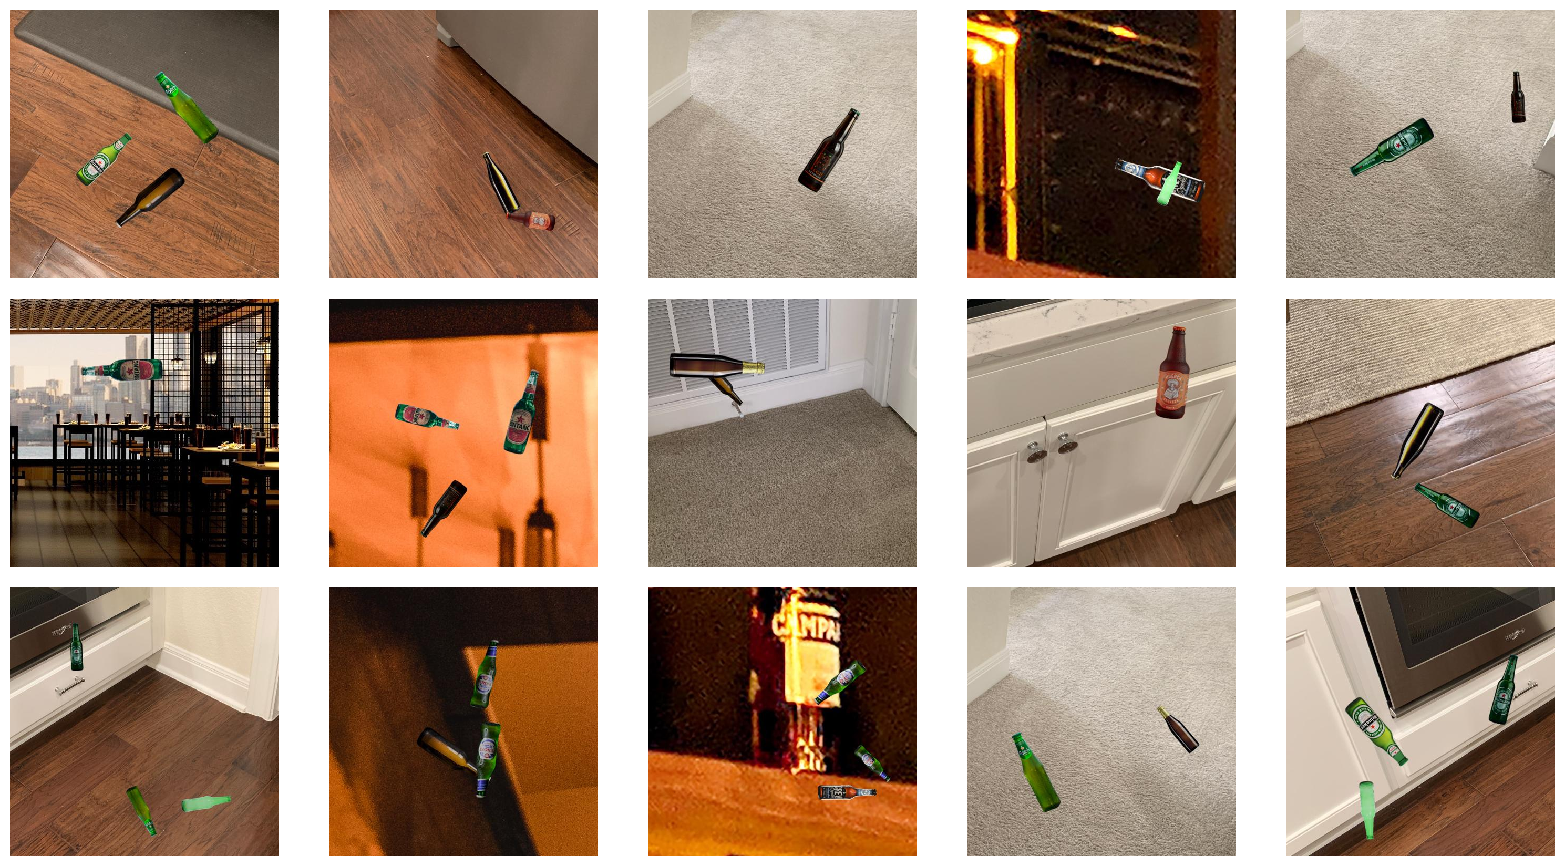

In [8]:
#check raw
print("raw images :")
plt.figure(figsize=(16,9))
for i in range(15):
    plt.subplot(3, 5,i+1)
    if i > 9:
        io.imshow(f"bottle/raw/Beer Bottles/000000{i}.jpg")
    else:
        io.imshow(f"bottle/raw/Beer Bottles/0000000{i}.jpg")
    plt.axis('off')
plt.show()

>> ### Splitted Dataset

In [9]:
print("Data setelah Split pada folder : ")
dic_tree(os.path.join(os.getcwd(), "bottle/split"))

Data setelah Split pada folder : 
  L__split/ (3)
    L__test/ (5)
      L__Beer Bottles/ (20)
      L__Plastic Bottles/ (20)
      L__Soda Bottle/ (20)
      L__Water Bottle/ (20)
      L__Wine Bottle/ (20)
    L__training/ (5)
      L__Beer Bottles/ (800)
      L__Plastic Bottles/ (800)
      L__Soda Bottle/ (800)
      L__Water Bottle/ (800)
      L__Wine Bottle/ (800)
    L__validation/ (5)
      L__Beer Bottles/ (180)
      L__Plastic Bottles/ (180)
      L__Soda Bottle/ (180)
      L__Water Bottle/ (180)
      L__Wine Bottle/ (180)


>> ### Preprocessed Dataset

Data Train :


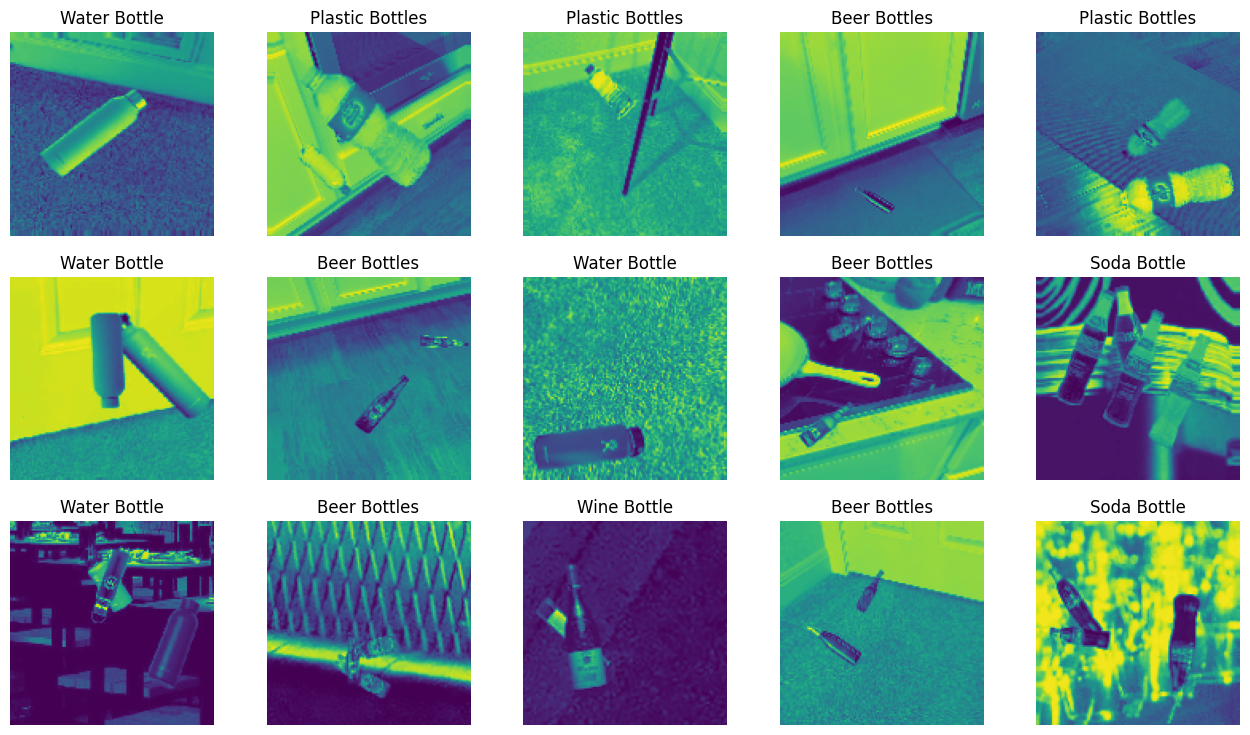

In [27]:
#check data train
print("Data Train :")
plt.figure(figsize=(16,9))
x = 1
for i in range(15):
    img, label = train.next()
    plt.subplot(3, 5, x)
    plt.title(class_names[np.argmax(label[0])])
    plt.axis('off')
    plt.imshow(img[0])
    x+=1

Data val :


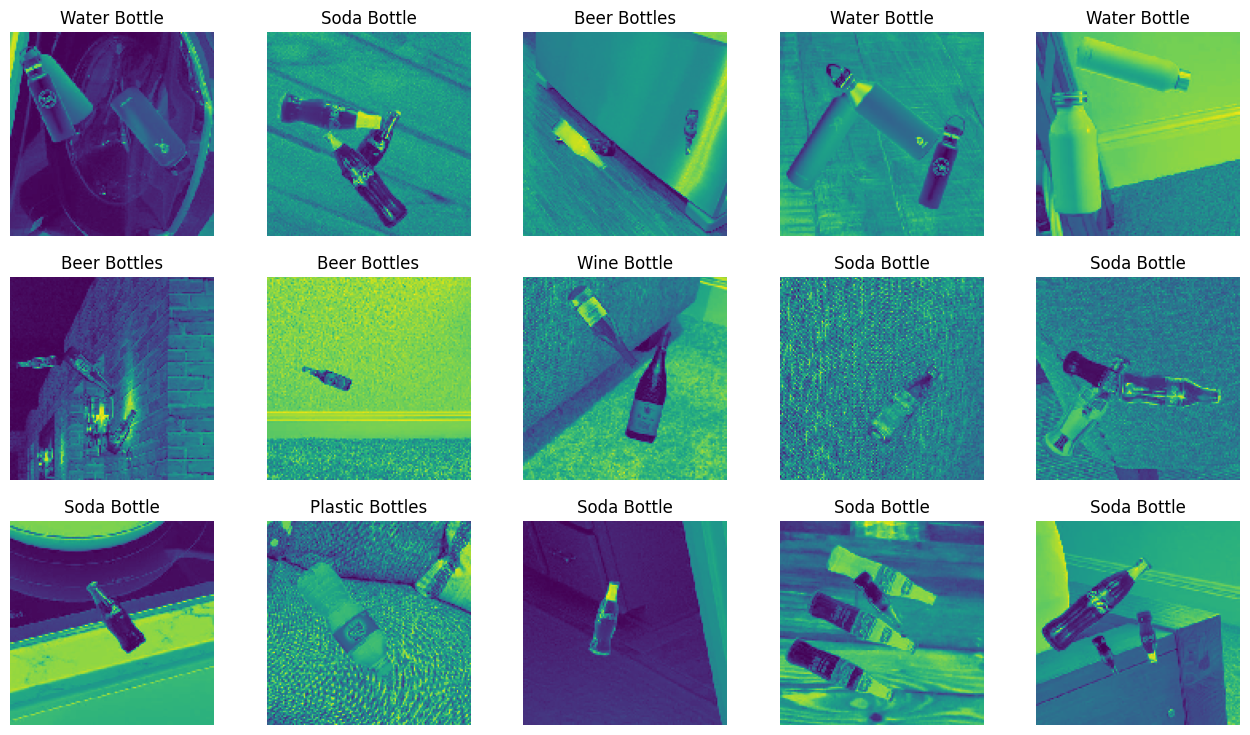

In [ ]:
#check data val
print("Data val :")
plt.figure(figsize=(16,9))
x = 1
for i in range(15):
    img, label = val.next()
    plt.subplot(3, 5, x)
    plt.title(class_names[np.argmax(label[0])])
    plt.axis('off')
    plt.imshow(img[0])
    x+=1

Data test :


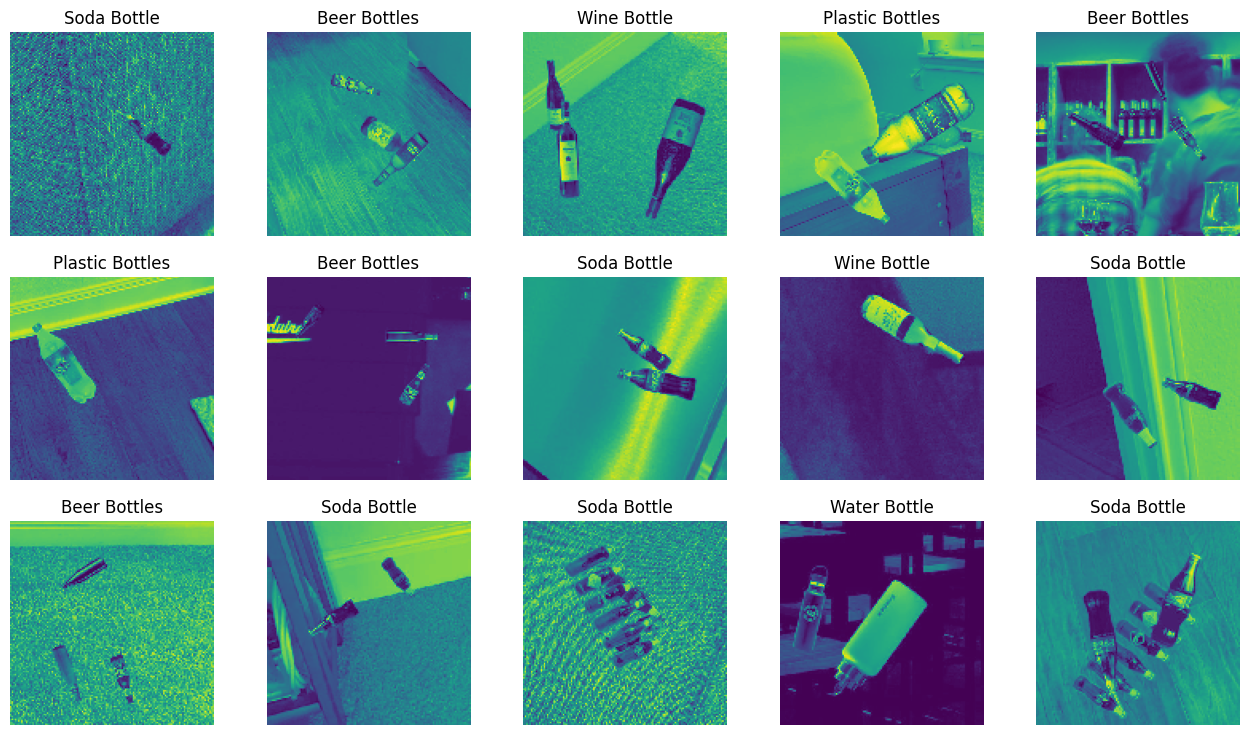

In [12]:
#check data test
print("Data test :")
plt.figure(figsize=(16,9))
x = 1
for i in range(15):
    img, label = test.next()
    plt.subplot(3, 5, x)
    plt.title(class_names[np.argmax(label[0])])
    plt.axis('off')
    plt.imshow(img[0])
    x+=1

>- ## Modeling
>> ### Callback Function

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 or logs.get('val_accuracy') > 0.98):
            self.model.stop_training = True

callback_function = myCallback()

>> ### Model Layers 

In [23]:
model = Sequential(name = "bottlePredicter")

#input layer
model.add(Conv2D(256, (3, 3), 
    activation = 'relu', 
    input_shape = [128, 128, 1], 
    kernel_regularizer = l2(0.0005), 
    bias_regularizer = l2(0.0005)
))
model.add(ThresholdedReLU(0.05))
model.add(MaxPooling2D((2, 2), (2, 2)))
model.add(Dropout(0.5))

#hidden layer
model.add(Conv2D(128, (3, 3), 
    activation = 'relu', 
    kernel_regularizer = l2(0.0005), 
    bias_regularizer = l2(0.0005)
))
model.add(MaxPooling2D((2, 2), (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), 
    activation = 'relu', 
    kernel_regularizer = l2(0.0005), 
    bias_regularizer = l2(0.0005)
))
model.add(MaxPooling2D((2, 2), (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(16, (3, 3), 
    activation = 'relu', 
    kernel_regularizer = l2(0.0005), 
    bias_regularizer = l2(0.0005)
))
model.add(MaxPooling2D((2, 2), (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(8, (3, 3), 
    activation = 'relu', 
    kernel_regularizer = l2(0.0005), 
    bias_regularizer = l2(0.0005)
))
model.add(MaxPooling2D((2, 2), (2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32,
    activation='relu', 
    kernel_regularizer = l2(0.0005), 
    bias_regularizer = l2(0.0005)
))

#output layer
model.add(Dense(5, 
    activation='softmax', 
    kernel_regularizer = l2(0.0005), 
    bias_regularizer = l2(0.0005)
))

In [19]:
model.summary()

Model: "bottlePredicter"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 256)     2560      
                                                                 
 thresholded_re_lu_1 (Thresh  (None, 126, 126, 256)    0         
 oldedReLU)                                                      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 256)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 256)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 128)       295040    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)  

>> ### Model Compiling

In [28]:
model.compile(
    'adam',
    'categorical_crossentropy',
    ['accuracy']
)

>> ### Model Training

In [29]:
hasil = model.fit(
    train, 
    epochs = 200,
    validation_data = val,
    callbacks = callback_function
)

Epoch 1/200
63/63 [==============================] - 488s 8s/step - loss: 1.5469 - accuracy: 0.3167 - val_loss: 1.4844 - val_accuracy: 0.3500
Epoch 2/200
63/63 [==============================] - 500s 8s/step - loss: 1.4612 - accuracy: 0.3458 - val_loss: 1.4812 - val_accuracy: 0.3522
Epoch 3/200
63/63 [==============================] - 484s 8s/step - loss: 1.4326 - accuracy: 0.3740 - val_loss: 1.4267 - val_accuracy: 0.3733
Epoch 4/200
63/63 [==============================] - 483s 8s/step - loss: 1.3979 - accuracy: 0.3862 - val_loss: 1.4500 - val_accuracy: 0.3656
Epoch 5/200
63/63 [==============================] - 482s 8s/step - loss: 1.3668 - accuracy: 0.3997 - val_loss: 1.3562 - val_accuracy: 0.3933
Epoch 6/200
63/63 [==============================] - 494s 8s/step - loss: 1.3444 - accuracy: 0.4153 - val_loss: 1.3779 - val_accuracy: 0.4078
Epoch 7/200
63/63 [==============================] - 591s 9s/step - loss: 1.3158 - accuracy: 0.4257 - val_loss: 1.3210 - val_accuracy: 0.4089
Epoch 

In [52]:
#Augmentasi Data untuk data train ke 2
img_datagenT = ImageDataGenerator(
    rescale = 1./255,
    featurewise_std_normalization = True,
    rotation_range = 0.45,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    zoom_range = 0.005,
    brightness_range = (0.5, 1),
    horizontal_flip = True,
    fill_mode='nearest'
)

train2 = img_datagenT.flow_from_directory(
    p_train,
    target_size = (128, 128),
    color_mode = 'grayscale',
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 64
)

Found 4000 images belonging to 5 classes.


In [53]:
hasil2 = model.fit(
    train2, 
    epochs = 200,
    validation_data = val,
    callbacks = callback_function
)

Epoch 1/200
63/63 [==============================] - 534s 8s/step - loss: 0.9596 - accuracy: 0.7225 - val_loss: 1.0573 - val_accuracy: 0.7344
Epoch 2/200
63/63 [==============================] - 515s 8s/step - loss: 0.8787 - accuracy: 0.7402 - val_loss: 1.0461 - val_accuracy: 0.7311
Epoch 3/200
63/63 [==============================] - 508s 8s/step - loss: 0.8401 - accuracy: 0.7592 - val_loss: 1.0478 - val_accuracy: 0.7144
Epoch 4/200
63/63 [==============================] - 508s 8s/step - loss: 0.8301 - accuracy: 0.7705 - val_loss: 0.9534 - val_accuracy: 0.7500
Epoch 5/200
63/63 [==============================] - 517s 8s/step - loss: 0.8253 - accuracy: 0.7630 - val_loss: 1.1928 - val_accuracy: 0.6833
Epoch 6/200
63/63 [==============================] - 507s 8s/step - loss: 0.8210 - accuracy: 0.7590 - val_loss: 0.9841 - val_accuracy: 0.7256
Epoch 7/200
63/63 [==============================] - 505s 8s/step - loss: 0.7723 - accuracy: 0.7847 - val_loss: 0.9560 - val_accuracy: 0.7422
Epoch 

In [55]:
#Save trainned model
# WARNING NOTE : Will Overwrite the existing model file

# model_json = model.to_json()
# with open("model/bottle_predicter_model.json", "w") as json_file:
#     json_file.write(model_json)
# model.save_weights("model/bottle_predicter_weights.h5")